In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
# import pyspark.pandas as ps
import seaborn as sns
from pyspark.sql import SparkSession

In [28]:
df = pd.read_csv('../../Files/Submissions/author_db.csv')

In [33]:
df.head()

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts
0,------------------16,NaN,1.0,NaN
1,------------------GL,1.0,NaN,1.0
2,------------------O,NaN,5.0,NaN
3,------------------f,1.0,NaN,NaN
4,------------------fd,NaN,1.0,NaN


In [30]:
df = df.drop([0,1], axis=0)

In [31]:
df.rename({'Unnamed: 0': 'Author', 'score' : 'Anti-Vaccine Posts', 'score.1': 'Neutral Posts', 'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)

In [32]:
df.reset_index(drop=True, inplace=True)

In [35]:
df = df.fillna(0)

In [42]:
df.sort_values(by='Anti-Vaccine Posts', ascending=False)[0:50]

,Author,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts
2843333,[deleted],239298.0,525042.0,18793.0
4333843,regian24,3089.0,12853.0,749.0
2838073,ZoltarsGang,3049.0,3567.0,160.0
3569839,harryg888,2891.0,67638.0,3027.0
819500,EricSchC1fr,2276.0,37383.0,1282.0
3548796,guanaco55,2126.0,19005.0,212.0
1845387,OliverMarkusMalloy,2086.0,10475.0,231.0
4809569,whosthetard,1864.0,516.0,600.0
19626,1000000students,1819.0,30316.0,879.0
3815229,kevinowdziej,1532.0,6743.0,906.0


In [43]:
df2 = pd.read_csv('../../Files/Submissions/date_db.csv')

In [45]:
df2 = df2.drop([0,1], axis=0)
df2.rename({'Unnamed: 0': 'Date', 
    'score' : 'Anti-Vaccine Posts', 
    'score.1': 'Neutral Posts', 
    'score.2': 'Pro-Vaccine Posts'}, axis=1, inplace=True)
df2.reset_index(drop=True, inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])

In [46]:
df2.head()

,Date,Anti-Vaccine Posts,Neutral Posts,Pro-Vaccine Posts
0,2020-03-01,6011.0,26076.0,1504.0
1,2020-03-02,5920.0,29425.0,1502.0
2,2020-03-03,5948.0,29862.0,1549.0
3,2020-03-04,6016.0,29916.0,1593.0
4,2020-03-05,6132.0,29600.0,1504.0


<AxesSubplot:xlabel='Date'>

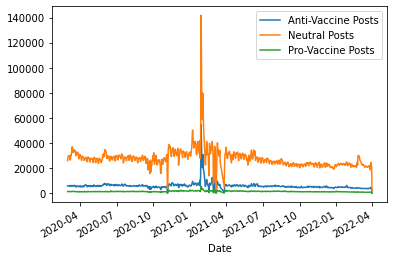

In [50]:
df2.plot(x='Date')

## Comments

In [5]:
df = pd.read_csv('../../Files/Comments/author_db.csv')

In [6]:
len(df)

1917269

In [7]:
df.head()

,Unnamed: 0,score,score.1,score.2
0,pred_1,0.0,1.0,2.0
1,author,NaN,NaN,NaN
2,------------------GL,1.0,1.0,NaN
3,------------------f,25.0,7.0,1.0
4,---------------g,1.0,NaN,NaN


In [9]:
df.drop([0,1], axis=0)

,Unnamed: 0,score,score.1,score.2
2,------------------GL,1.0,1.0,NaN
3,------------------f,25.0,7.0,1.0
4,---------------g,1.0,NaN,NaN
5,-------------0,7.0,2.0,1.0
6,-------------Wulfric,4.0,2.0,NaN
...,...,...,...,...
1917264,zzzzzzzzxzzzzzzzzzz,3.0,NaN,NaN
1917265,zzzzzzzzzra,4.0,NaN,NaN
1917266,zzzzzzzzzssss,2.0,2.0,NaN
1917267,zzzzzzzzzzzzvzzzzvzz,1.0,NaN,NaN


In [10]:
df2 = pd.read_csv('../../Files/Comments/EDA_stats.csv')

In [11]:
df2

,Unnamed: 0,posts,posts_pro,posts_anti,posts_neutral,authors
0,Government_is_lame,4772,3878,875,19,1326
1,WikiLeaks,20159,16204,2678,1277,4769
2,DemocraticSocialism,104328,85234,11558,7536,18359
3,weddingshaming,279424,151266,122507,5651,58370
4,collapse,1993238,1572430,394512,26296,112822
...,...,...,...,...,...,...
102,CityPorn,500,259,200,41,331
103,sciencememes,25011,14723,9832,456,8338
104,fragilecommunism,171991,140904,28049,3038,20039
105,CovidVaccinated,260653,87764,23408,149481,32418
